# Boston Housing

In this notebook we will try to predict prizes of houses after we train our model on train data.
Here i have used sklearn libray and wrote own linear regression code to predict housing prizes.

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are also many other attributes that are available 

#import libraries

In [19]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_boston = load_boston()

In [3]:
print(data_boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston_df = pd.DataFrame(data_boston.data)

In [6]:
print(boston_df.head(5))

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
print(boston_df.shape)

(506, 13)


In [9]:
boston_df['PRICE'] = data_boston.target
print(boston_df.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [10]:
X = boston_df.drop('PRICE', axis = 1)
Y = boston_df['PRICE']

In [14]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


33.09853441172189


Text(0,0.5,'Predicted prices')

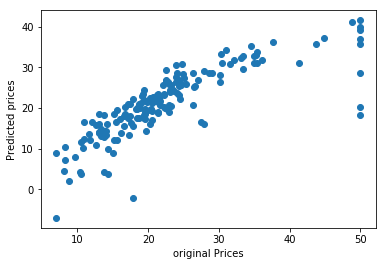

In [74]:
clf = SGDRegressor()
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_test, clf.predict(X_test)))

Y_pred = clf.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("original Prices")
plt.ylabel("Predicted prices")


In [58]:
cost_arr=[]
def linear_regression(x,y):
    N=float(len(Y))
    m_current=[0,0,0,0,0,0,0,0,0,0,0,0,0]
    b_current=0
    y_current=0
    learning_rate=0.1
    y_current_arr=[]
    cost=0
    data1=0.0
    data2=0.0
    sum=0
    epochs=1000
    m_gradient=0
    b_gradient=0
    for i in range(0,2000,1):
        m_gradient=0
        b_gradient=0
        y_current_arr=[]
        for data1,data2 in zip(x,y):
            #data1=np.asarray(data1,dtype='float64')
            y_current=np.dot(m_current,data1)+b_current
            y_current_arr.append(y_current)
            m_gradient=m_gradient+(-2*(data1*(data2-y_current)))
            b_gradient=b_gradient+(-2*(data2-y_current))
        m_gradient=m_gradient/N
        b_gradient=b_gradient/N
        
        m_current=m_current-(learning_rate*m_gradient)
        b_current=b_current-(learning_rate*b_gradient)
        #learning_rate=learning_rate/2
        mse_train=mean_squared_error(Y_train,y_current_arr)
        cost_arr.append(mse_train)
    return m_current,b_current
            

In [59]:
m_new,b_new=linear_regression(X_train,Y_train)

In [60]:
print(m_new)
print(b_new)

[-1.34304688  0.8981706  -0.17177123  0.19955355 -1.49877486  2.80957727
 -0.32626982 -2.87836973  2.97282339 -2.27550655 -2.13872457  1.09982007
 -3.37184504]
22.312694610966133


In [61]:
print(cost_arr)

[587.7500589970501, 417.6935039958458, 316.80513784352024, 242.4306235998691, 186.80752874808275, 145.16690098262524, 113.98644636343391, 90.63341803872827, 73.13841858396333, 60.02806004849205, 50.19993236212014, 42.82911917385785, 37.298291013359275, 33.145423744513785, 30.024694585055848, 27.6772314945352, 25.909231104362558, 24.57558755282793, 23.567643303846328, 22.80402336235975, 22.22377618562882, 21.78124038238227, 21.442202688161526, 21.181022179145806, 20.978477558688407, 20.8201555859319, 20.69524452006087, 20.595630718424246, 20.515222161151193, 20.449441854188926, 20.39484841344496, 20.34885187130959, 20.309500783019026, 20.27532272456844, 20.245204775218077, 20.218303946852412, 20.193980044447724, 20.171745329839176, 20.151226774353646, 20.13213774404589, 20.114256753562515, 20.097411517908736, 20.08146697563957, 20.066316289687386, 20.051874081205025, 20.038071338429972, 20.02485158237132, 20.012167975846808, 19.999981140858445, 19.988257508085084, 19.976968066325387, 19

In [64]:
y_pred_arr=[]
for test_data in X_test:
    y_pred_new=np.dot(test_data,m_new)+b_new
    y_pred_arr.append(y_pred_new)

Text(0,0.5,'Predicted prices')

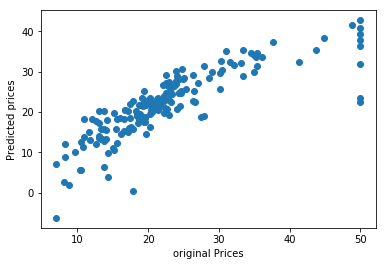

In [65]:
plt.scatter(Y_test,y_pred_arr)
plt.xlabel("original Prices")
plt.ylabel("Predicted prices")

In [66]:
mse_test=mean_squared_error(Y_test,y_pred_arr)
print(mse_test)

28.5413670967604


In [72]:
itr= np.arange(1,2001)

Text(0,0.5,'AUC')

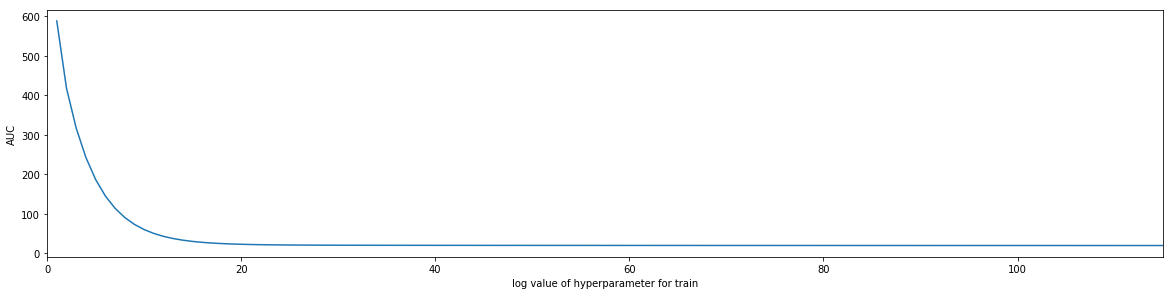

In [73]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.plot(itr, cost_arr)
plt.xlim([0, 115])
#plt.ylim([-0.7, 0])

#for xy in zip(itr, (cv_bow_train_rbf)):
#    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('iteration no')
plt.ylabel('MSE')

    
#plt.subplot(2, 1, 2)    
#plt.plot(tuned_parameters_list, cv_bow_cv_rbf)    
#for xy in zip(tuned_parameters_list_log, np.round(cv_bow_cv_rbf,3)):
 #   plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
#plt.xlim([0, 15])

#plt.xlabel('log value of hyperparameter for cv')
#plt.ylabel('AUC')
#plt.show()

In [78]:
from prettytable import PrettyTable
x = PrettyTable()

In [79]:
x.field_names = ["sk learn MSE test","SGD code MSE test"]

In [80]:
x.add_row(["33.09","28.541"])

In [81]:
print(x)

+-------------------+-------------------+
| sk learn MSE test | SGD code MSE test |
+-------------------+-------------------+
|       33.09       |       28.541      |
+-------------------+-------------------+
